### **1.1 Import the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import statsmodels.graphics.gofplots as sm
import plotly.express as px
import random
import statistics
from scipy.stats import norm

### **1.2 Reading the Dataset**

In [105]:
dataset = pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')

**Printing the first 10 rows of the dataset**

In [5]:
dataset.head(10)

Unnamed: 0       ID  ...  nueroticism openess_to_experience
0      train   203097  ...      1.35490               -0.4455
1      train   579905  ...     -0.10760                0.8637
2      train   810601  ...     -0.86820                0.6721
3      train   267447  ...     -0.40780               -0.9194
4      train   343523  ...      0.09163               -0.1295
5      train  1027655  ...     -0.74150               -0.8608
6      train   947847  ...     -2.00920               -1.0872
7      train   912934  ...      0.14590                1.2470
8      train   552574  ...     -0.74150               -0.2859
9      train  1203363  ...      0.90660                0.0973

[10 rows x 39 columns]

**Finding the columns**

In [6]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

**Finding the last 10 rows of the dataset**

In [8]:
dataset.tail(10)

Unnamed: 0       ID  ...  nueroticism openess_to_experience
3988      train   466661  ...      1.32550                0.5024
3989      train  1204604  ...      1.03330                0.6721
3990      train   204287  ...     -1.34780                0.8183
3991      train   230873  ...     -0.05520                0.0284
3992      train   344407  ...      0.64983               -0.4229
3993      train    47916  ...      0.64980               -0.9194
3994      train   752781  ...      0.77980               -0.0943
3995      train   355888  ...     -1.31840               -0.7615
3996      train   947111  ...     -0.36120               -0.0943
3997      train   324966  ...      1.32553               -0.6035

[10 rows x 39 columns]

**Descirption of dataset**

In [9]:
dataset.describe()

ID        Salary  ...  nueroticism  openess_to_experience
count  3.998000e+03  3.998000e+03  ...  3998.000000            3998.000000
mean   6.637945e+05  3.076998e+05  ...    -0.169033              -0.138110
std    3.632182e+05  2.127375e+05  ...     1.007580               1.008075
min    1.124400e+04  3.500000e+04  ...    -2.643000              -7.375700
25%    3.342842e+05  1.800000e+05  ...    -0.868200              -0.669200
50%    6.396000e+05  3.000000e+05  ...    -0.234400              -0.094300
75%    9.904800e+05  3.700000e+05  ...     0.526200               0.502400
max    1.298275e+06  4.000000e+06  ...     3.352500               1.822400

[8 rows x 27 columns]

**Infomation of dataset**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [15]:
print(dataset.shape)
print("\n")
print(dataset.isnull().sum())

(3998, 39)


Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion   

**Finding correlation**

In [16]:
dataset.corr()

ID    Salary  ...  nueroticism  openess_to_experience
ID                     1.000000 -0.247294  ...    -0.146289               0.031359
Salary                -0.247294  1.000000  ...    -0.054685              -0.011312
10percentage           0.044547  0.177373  ...    -0.132496               0.036692
12graduation           0.673102 -0.161383  ...    -0.074369              -0.015069
12percentage           0.007069  0.170254  ...    -0.094369               0.006332
CollegeID              0.284540 -0.118690  ...    -0.008973              -0.010678
CollegeTier            0.035160 -0.179332  ...     0.023778              -0.019179
collegeGPA             0.047144  0.130103  ...    -0.074859               0.028071
CollegeCityID          0.284540 -0.118690  ...    -0.008973              -0.010678
CollegeCityTier       -0.035977  0.015384  ...     0.004442              -0.016790
GraduationYear         0.027539 -0.010053  ...    -0.000417               0.016855
English                0.135505  0.178219  ...    -0.155528               0.067979
Logical                0.102215  0.179275  ...    -0.178781               0.048420
Quant                 -0.055134  0.230627  ...    -0.131895               0.020377
Domain                -0.125639  0.104656  ...    -0.017928               0.010412
ComputerProgramming    0.018859  0.115665  ...    -0.084344               0.043133
ElectronicsAndSemicon -0.115601  0.000665  ...     0.021026              -0.013460
ComputerScience        0.482626 -0.100720  ...    -0.112652               0.058039
MechanicalEngg        -0.026147  0.018475  ...     0.036148              -0.027988
ElectricalEngg         0.104454 -0.047598  ...    -0.030870              -0.012585
TelecomEngg           -0.049272 -0.022691  ...     0.020638              -0.000141
CivilEngg             -0.017871  0.037639  ...     0.010555              -0.031201
conscientiousness      0.175557 -0.064148  ...    -0.330312               0.395649
agreeableness          0.024837  0.057423  ...    -0.207480               0.591541
extraversion           0.120979 -0.010213  ...    -0.096491               0.435074
nueroticism           -0.146289 -0.054685  ...     1.000000              -0.065795
openess_to_experience  0.031359 -0.011312  ...    -0.065795               1.000000

[27 rows x 27 columns]

**Drop Unnamed:0 column**

In [79]:
dataset1 = dataset.drop('Unnamed: 0', axis=1)
dataset1

ID     Salary  ... nueroticism openess_to_experience
0     203097   420000.0  ...     1.35490               -0.4455
1     579905   500000.0  ...    -0.10760                0.8637
2     810601   325000.0  ...    -0.86820                0.6721
3     267447  1100000.0  ...    -0.40780               -0.9194
4     343523   200000.0  ...     0.09163               -0.1295
...      ...        ...  ...         ...                   ...
3993   47916   280000.0  ...     0.64980               -0.9194
3994  752781   100000.0  ...     0.77980               -0.0943
3995  355888   320000.0  ...    -1.31840               -0.7615
3996  947111   200000.0  ...    -0.36120               -0.0943
3997  324966   400000.0  ...     1.32553               -0.6035

[3998 rows x 38 columns]

### **1.3 Univariate Analysis**

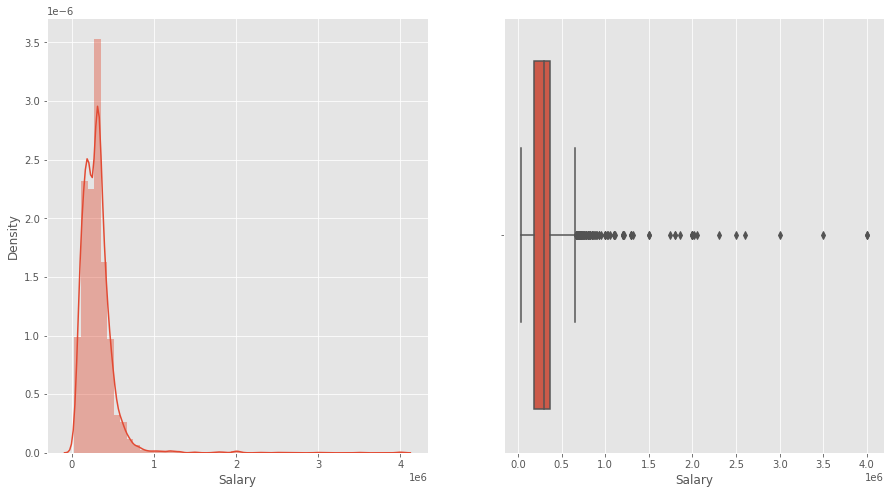

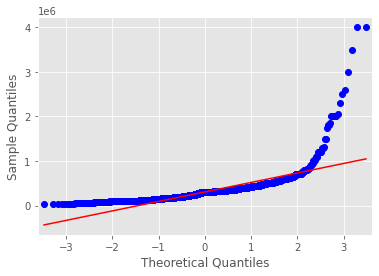

In [21]:
def plots(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    sm.ProbPlot(feature).qqplot(line = 's')


plots(dataset1.Salary)

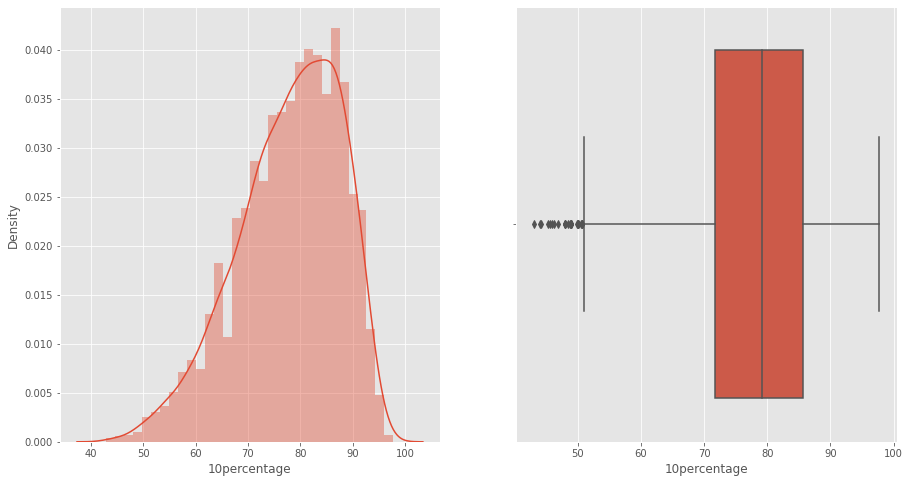

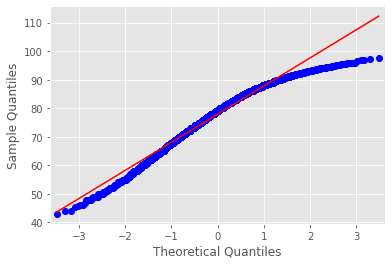

In [22]:
plots(dataset1['10percentage'])

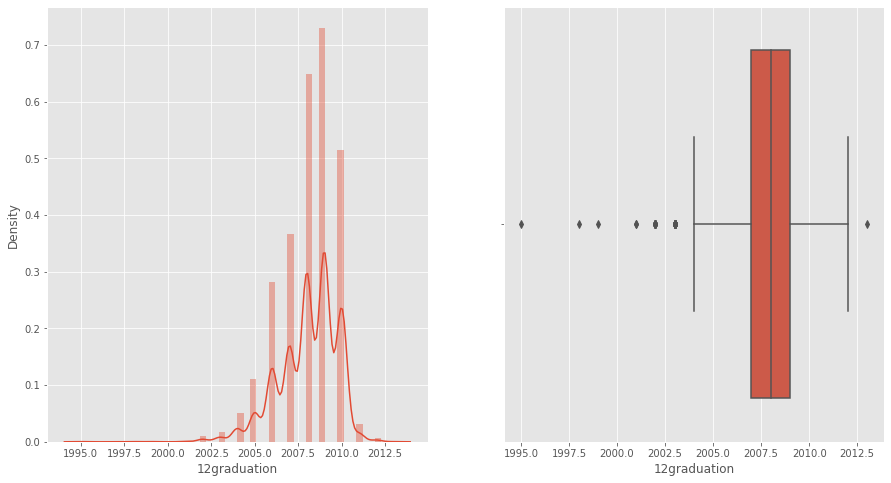

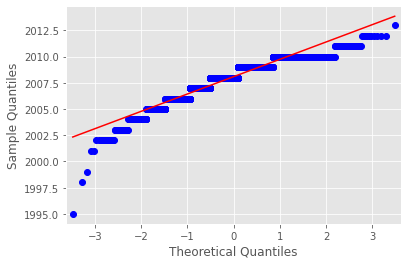

In [24]:
plots(dataset1['12graduation'])

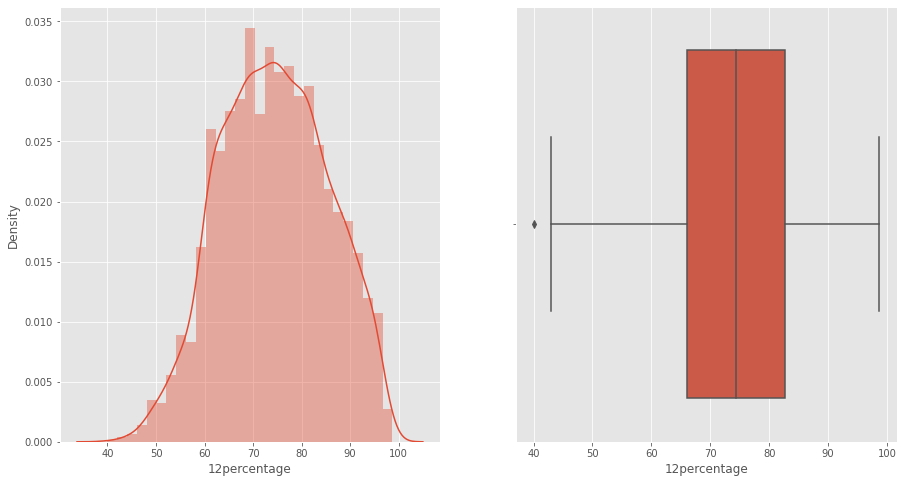

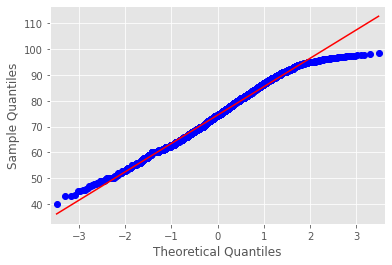

In [25]:
plots(dataset1['12percentage'])

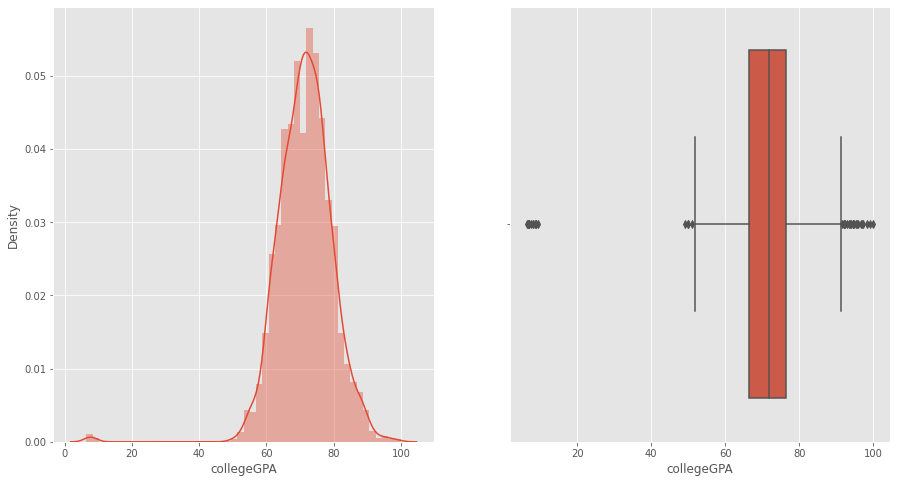

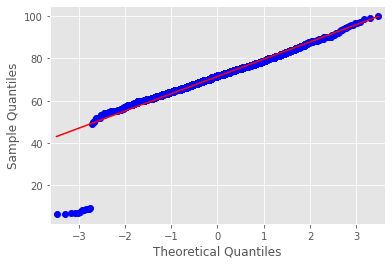

In [26]:
plots(dataset1.collegeGPA)

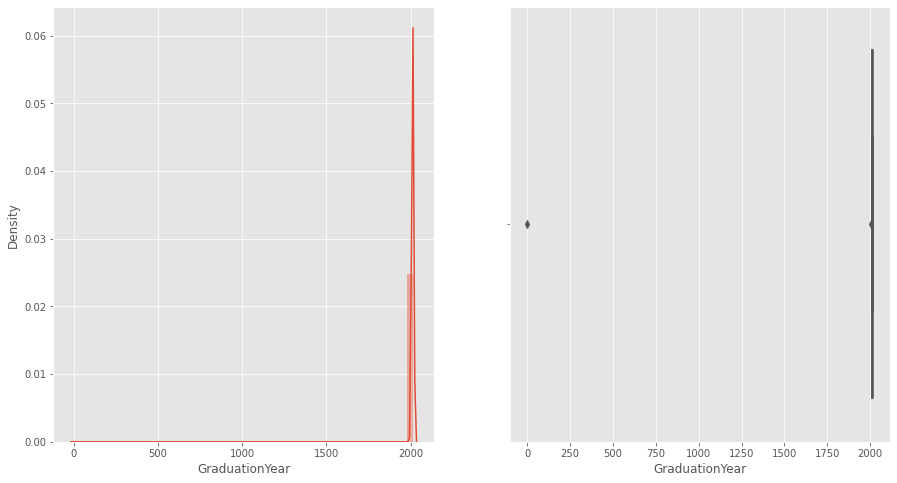

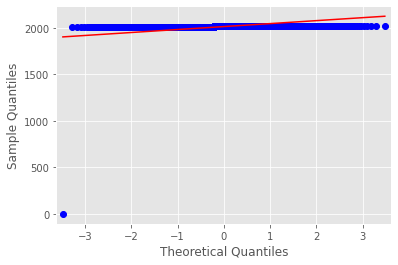

In [27]:
plots(dataset1.GraduationYear)

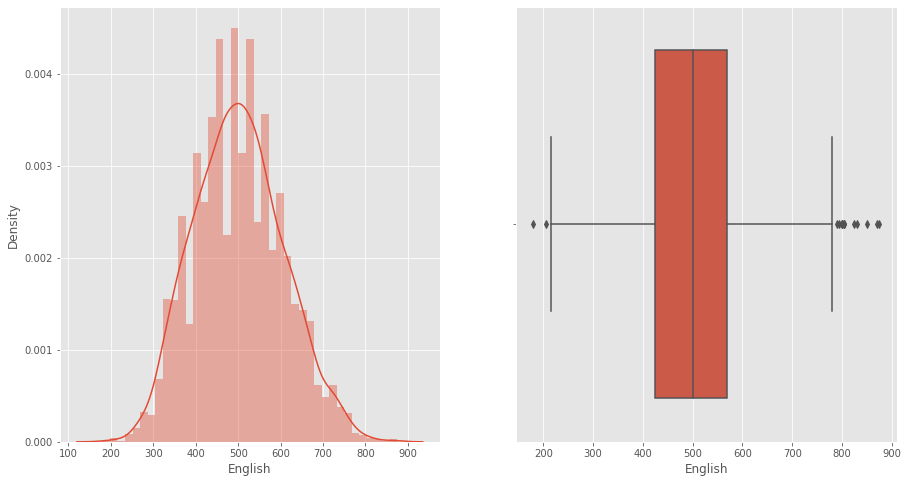

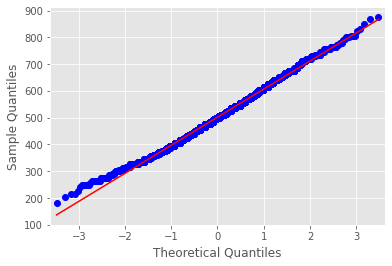

In [28]:
plots(dataset1.English)

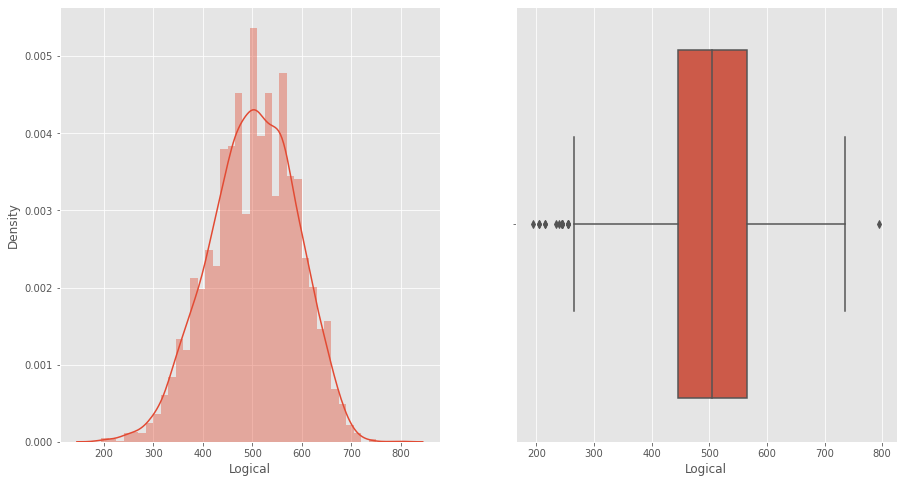

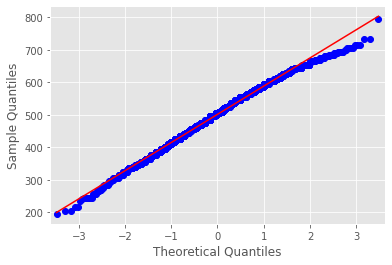

In [29]:
plots(dataset1.Logical)

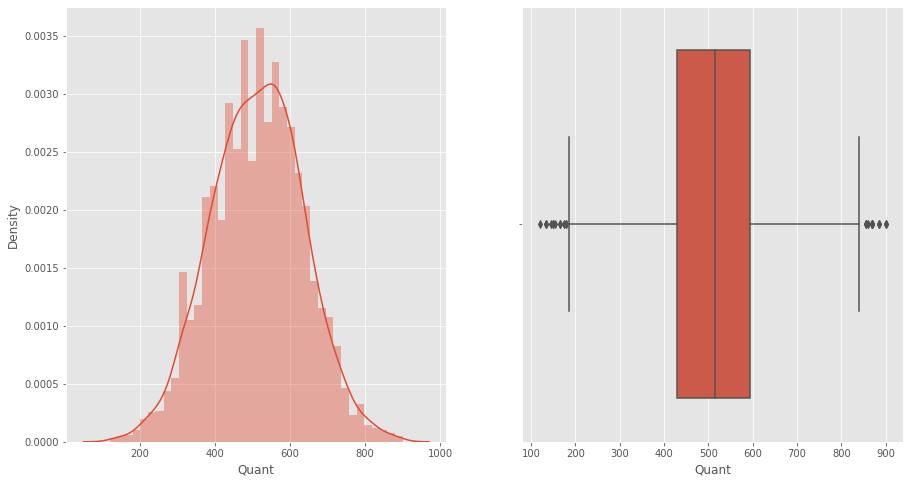

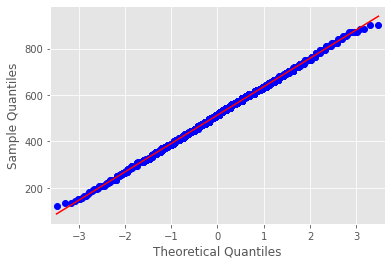

In [30]:
plots(dataset1.Quant)

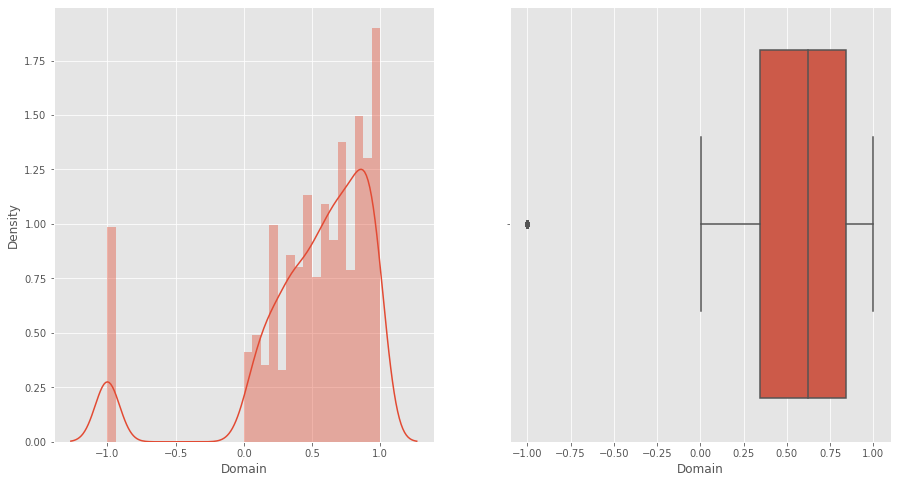

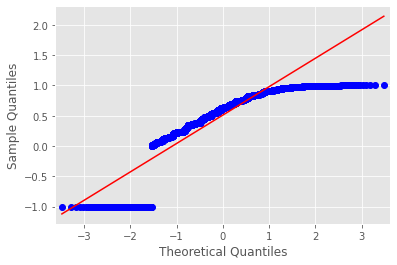

In [31]:
plots(dataset1.Domain)

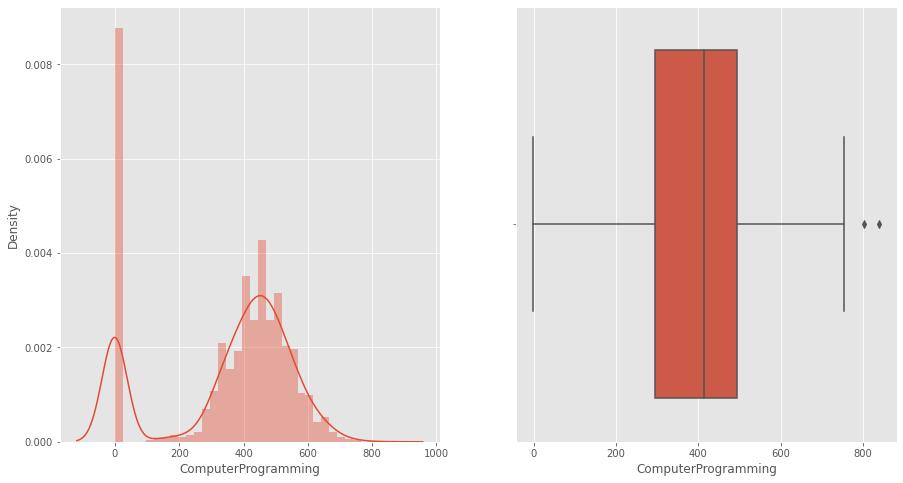

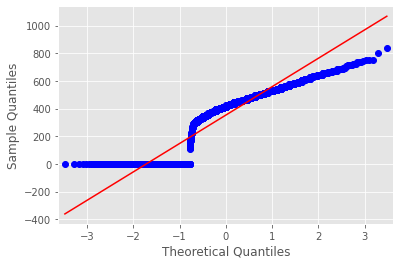

In [32]:
plots(dataset1.ComputerProgramming)

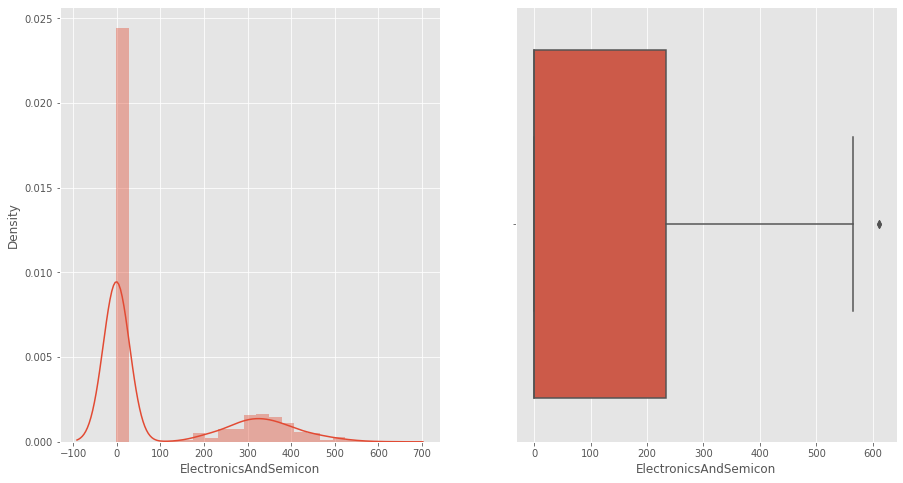

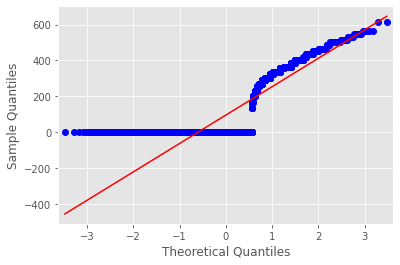

In [33]:
plots(dataset.ElectronicsAndSemicon)

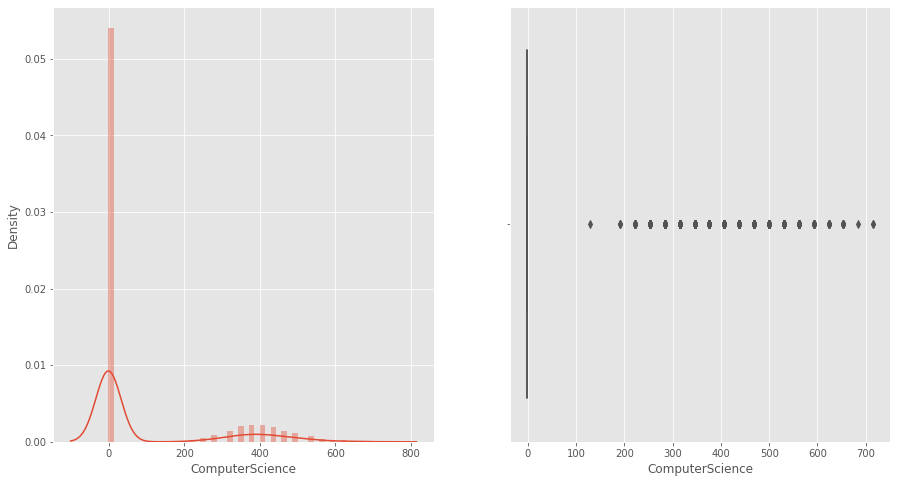

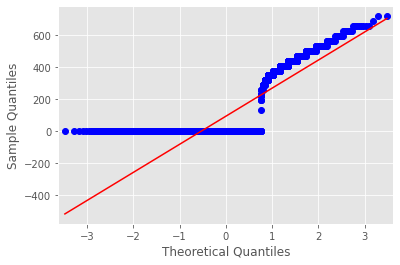

In [34]:
plots(dataset.ComputerScience)

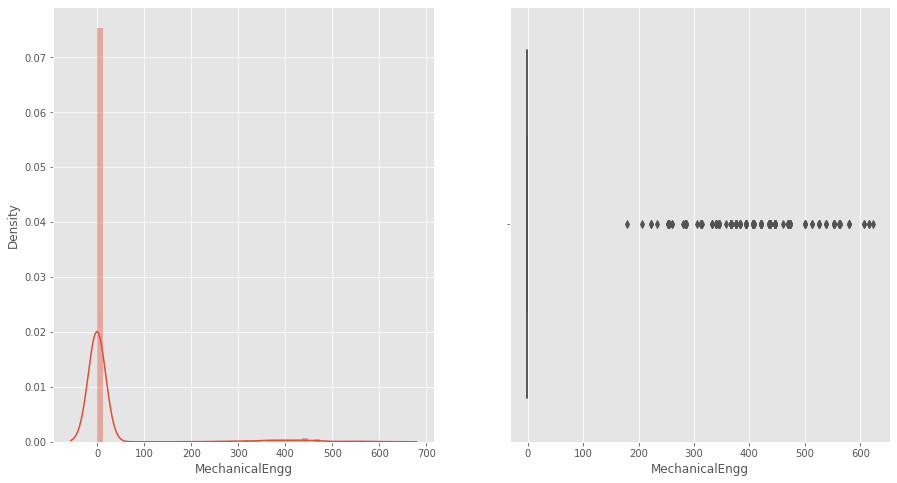

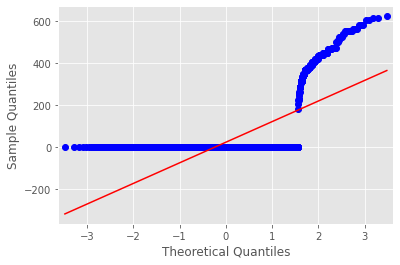

In [35]:
plots(dataset1.MechanicalEngg)

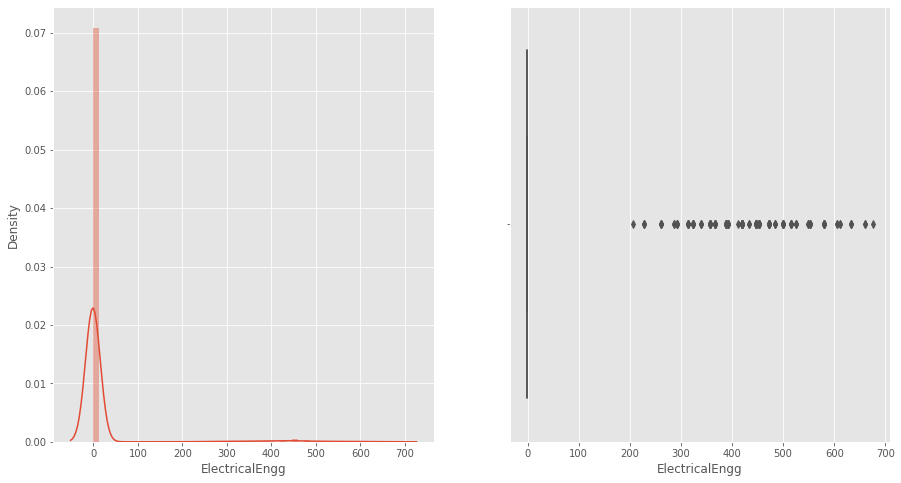

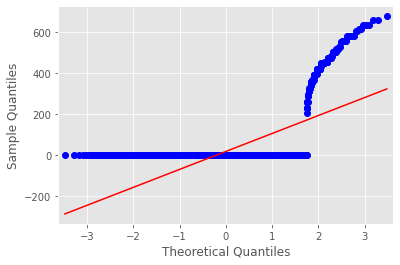

In [36]:
plots(dataset1.ElectricalEngg)

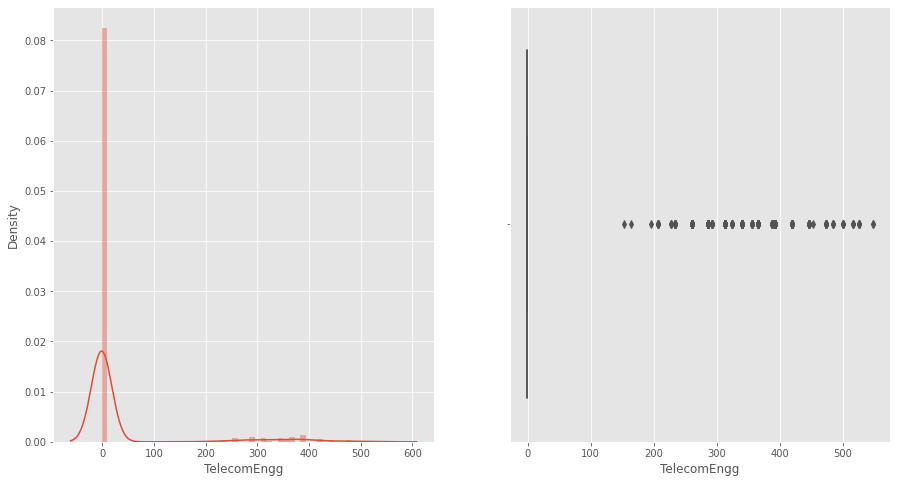

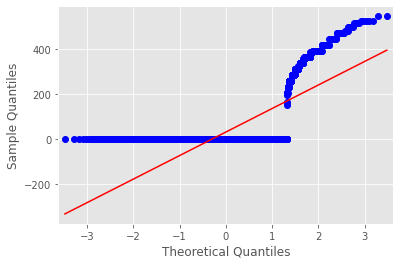

In [37]:
plots(dataset1.TelecomEngg)

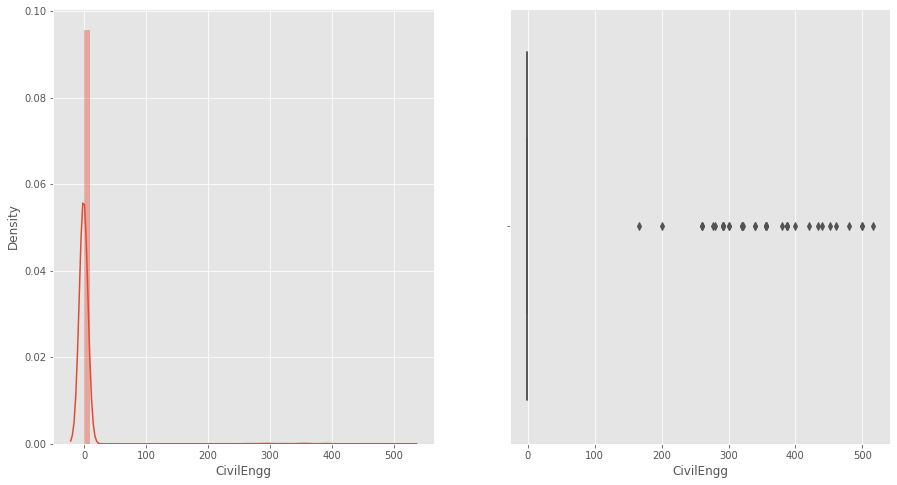

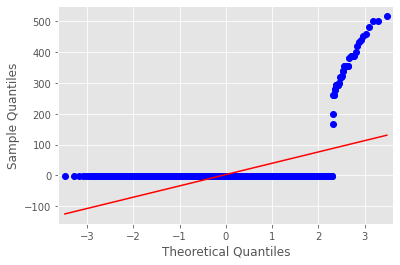

In [38]:
plots(dataset.CivilEngg)

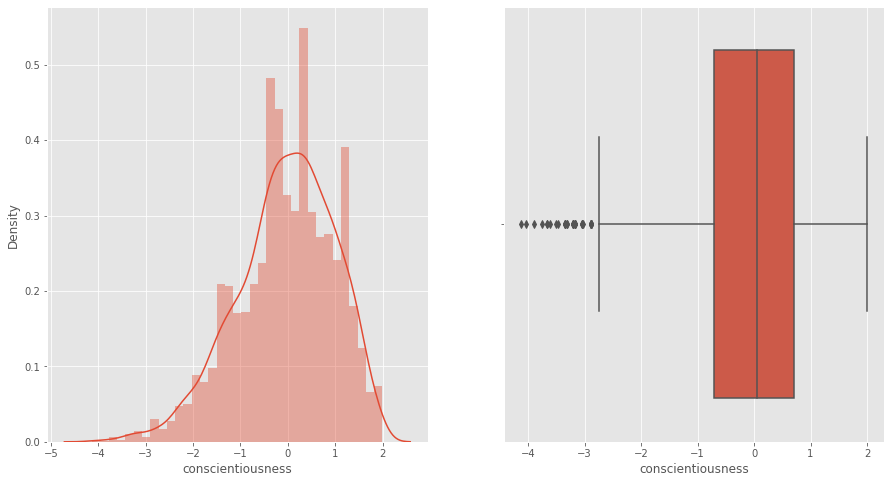

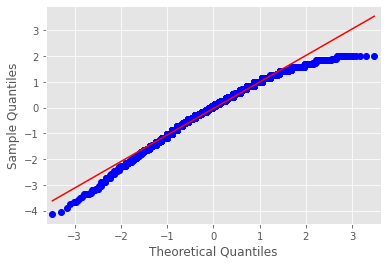

In [39]:
plots(dataset1.conscientiousness)

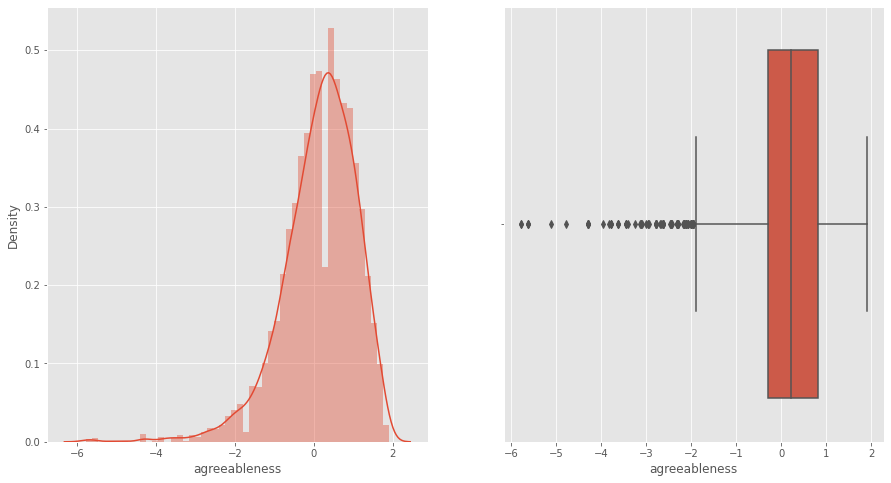

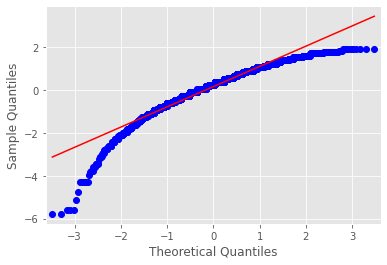

In [40]:
plots(dataset.agreeableness)

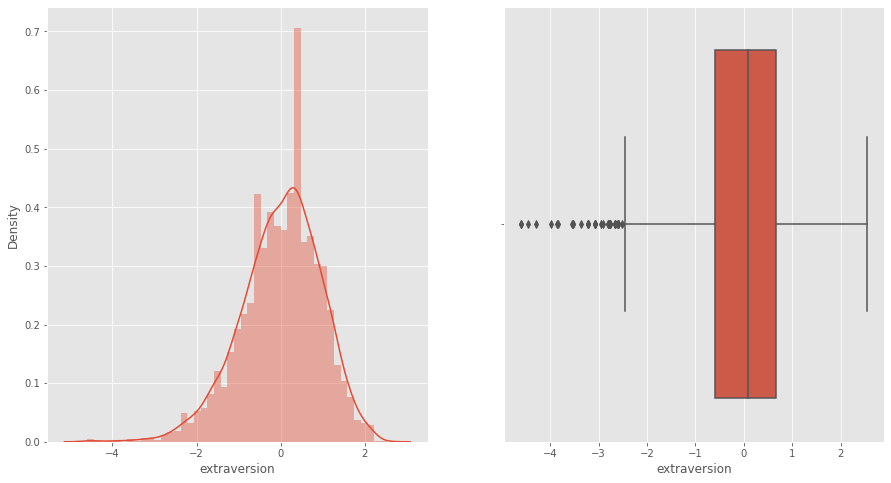

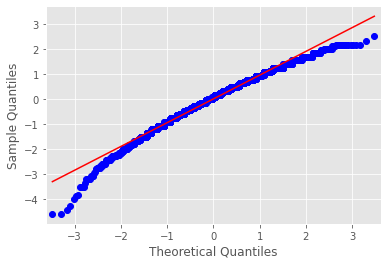

In [42]:
plots(dataset1.extraversion)

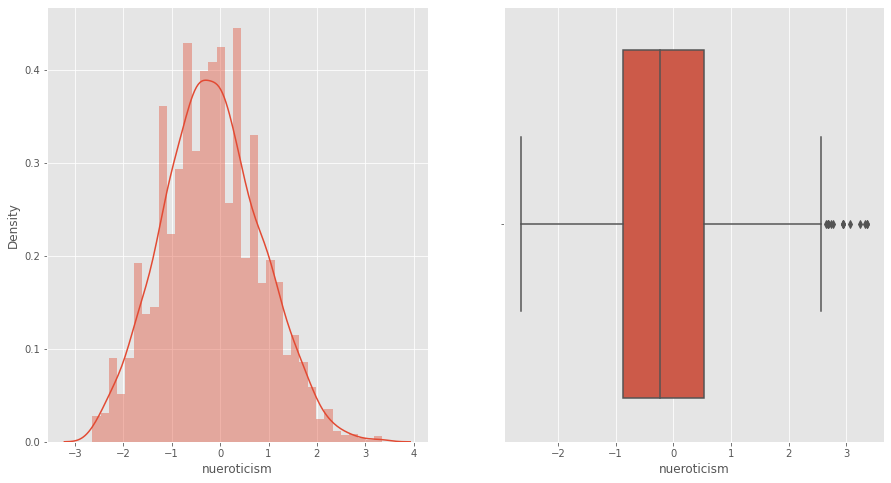

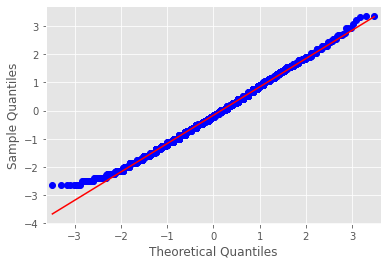

In [43]:
plots(dataset1.nueroticism)

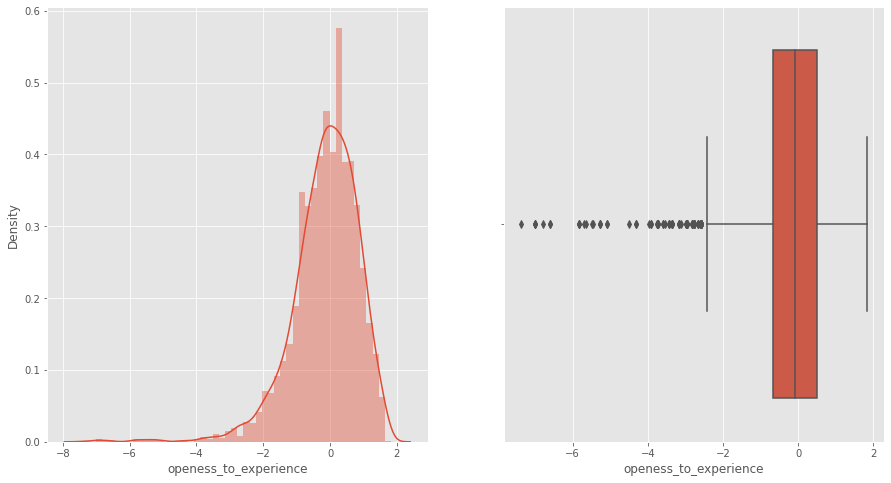

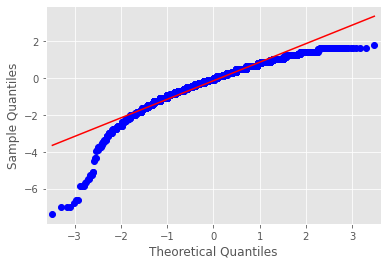

In [44]:
plots(dataset1.openess_to_experience)

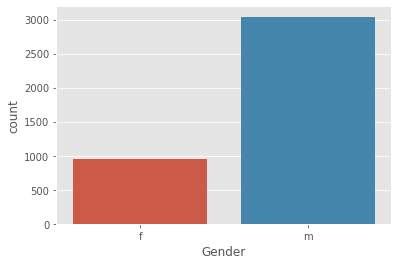

In [45]:
sns.countplot(dataset1['Gender'])

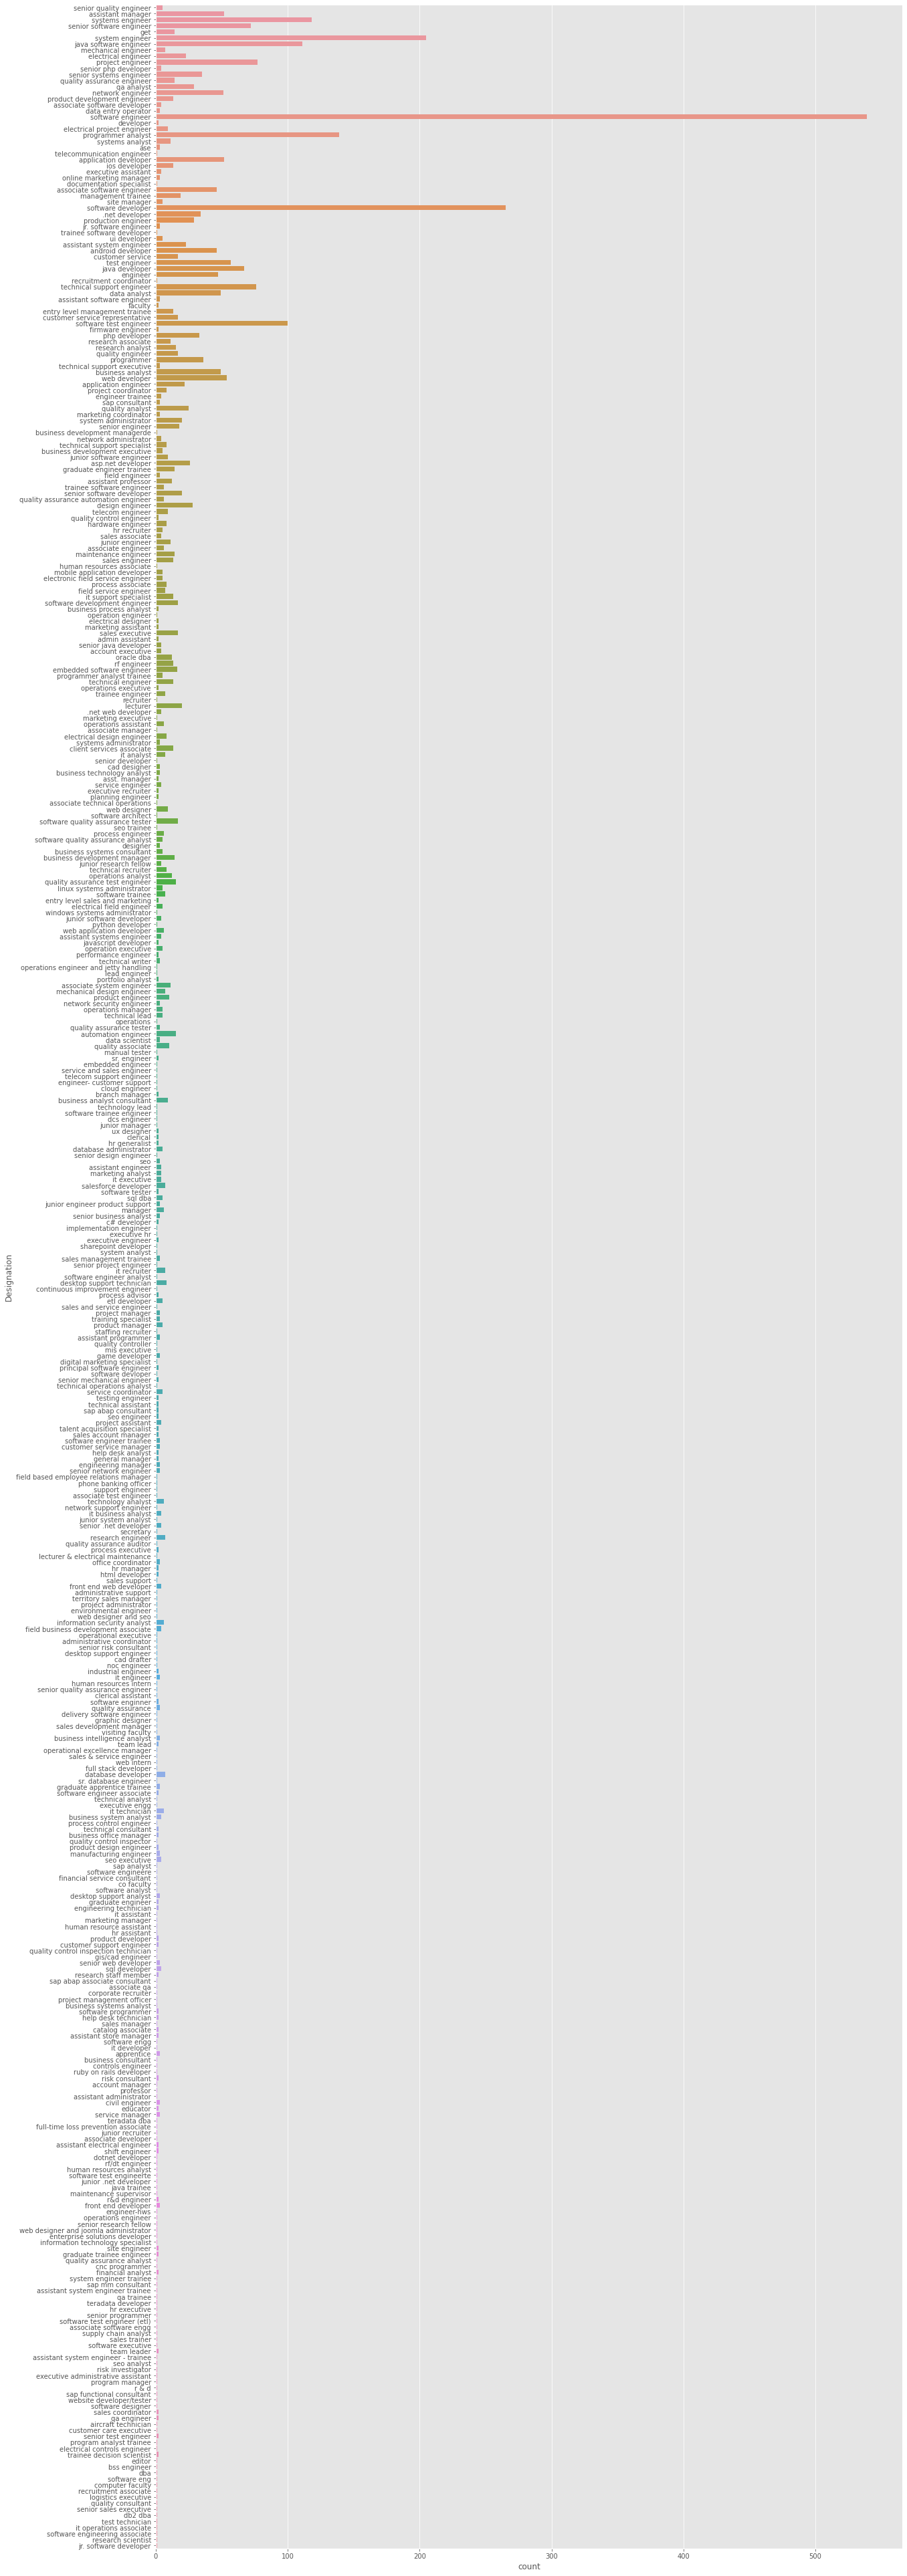

In [53]:
plt.figure(figsize=(20,70))
sns.countplot(y=dataset1['Designation'])

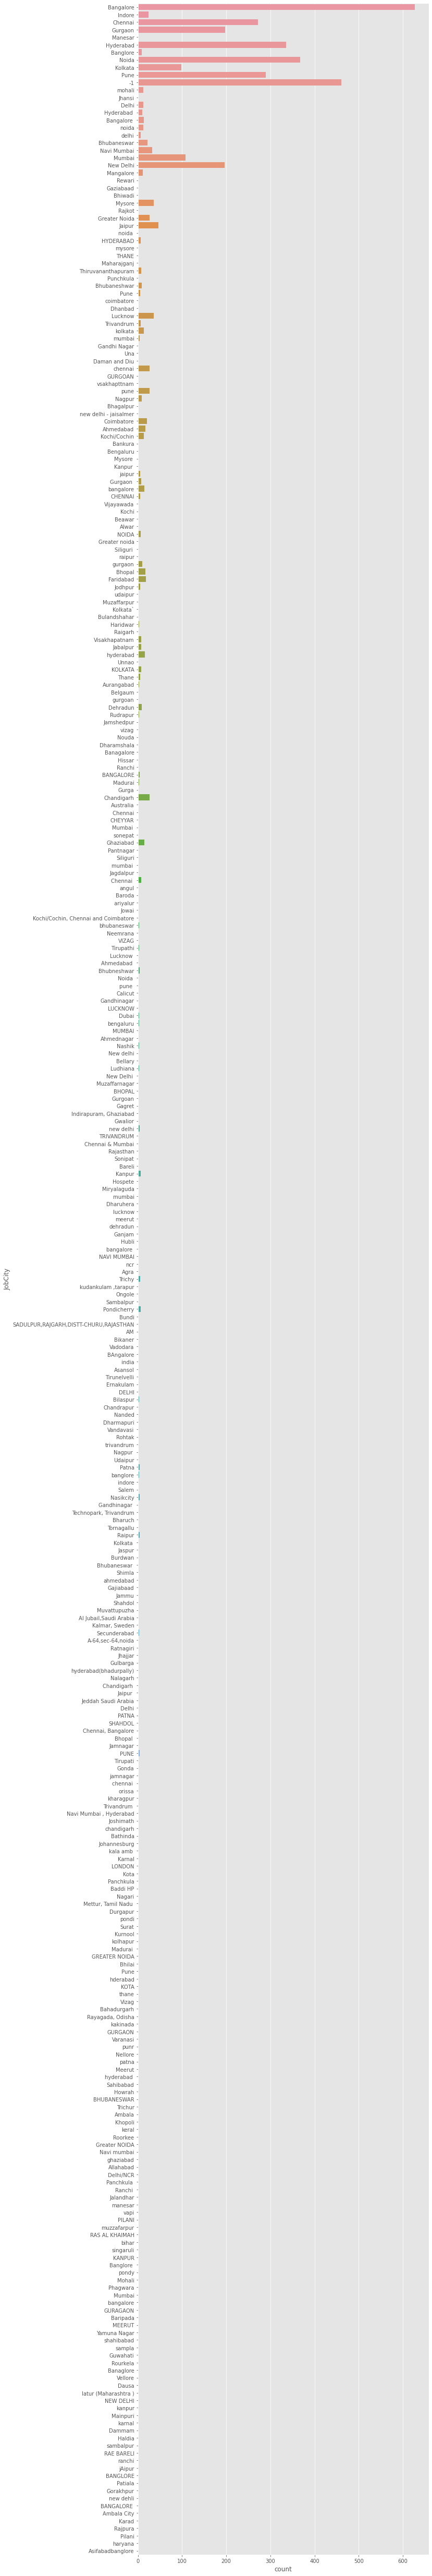

In [51]:
plt.figure(figsize=(10,90))
sns.countplot(y=dataset['JobCity'])

### **1.4 Bivariate Analysis**

In [54]:
def Biplots(param_1,param_2):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    sns.scatterplot(param_1,param_2)
    plt.subplot(1,2,2)
    plt.hexbin(param_1,param_2)
    plt.figure(figsize=(150,10))
    sns.swarmplot(param_1,param_2)

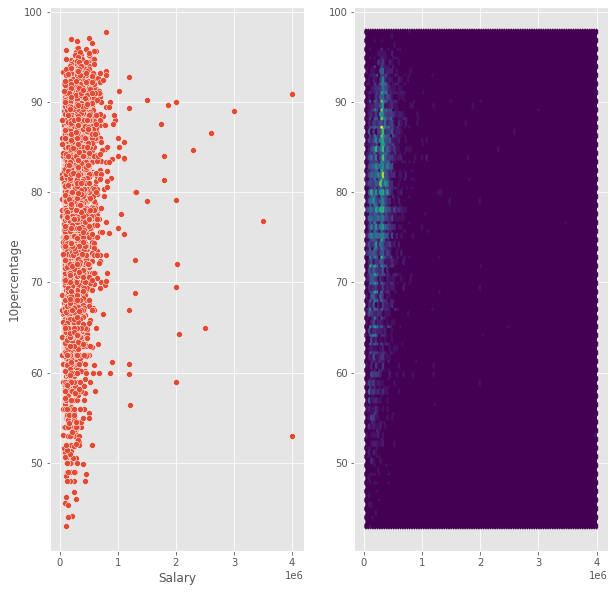

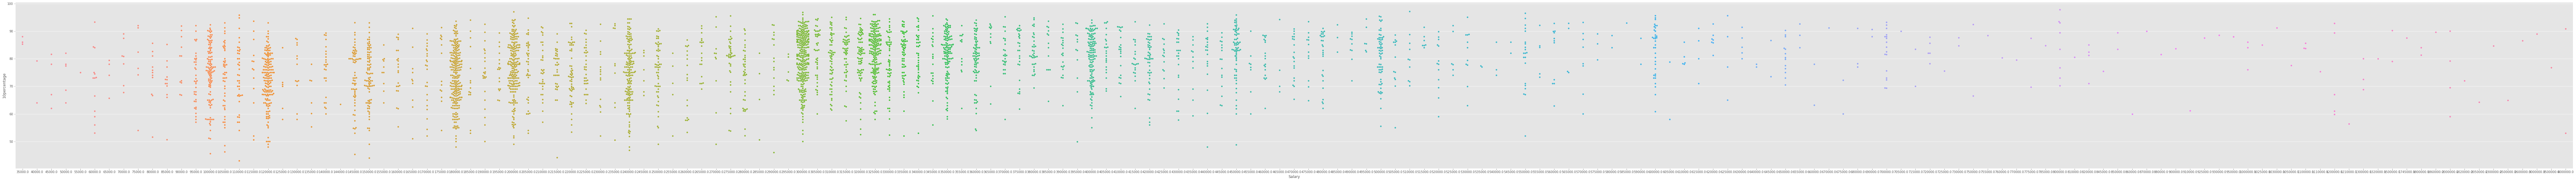

In [55]:
Biplots(dataset1['Salary'],dataset1['10percentage'])

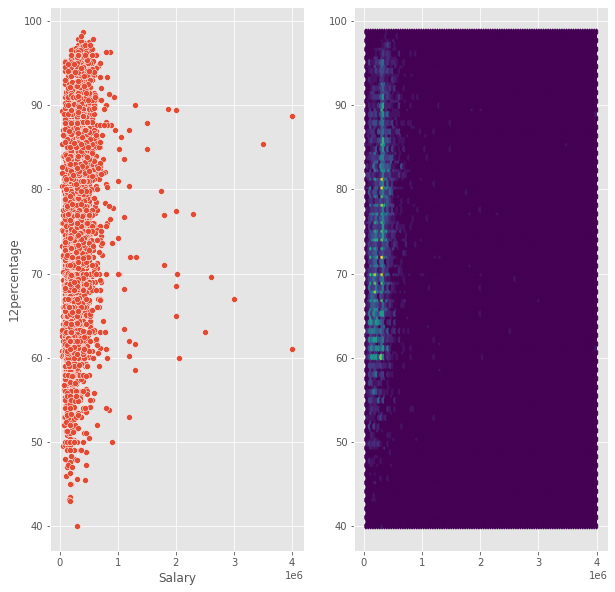

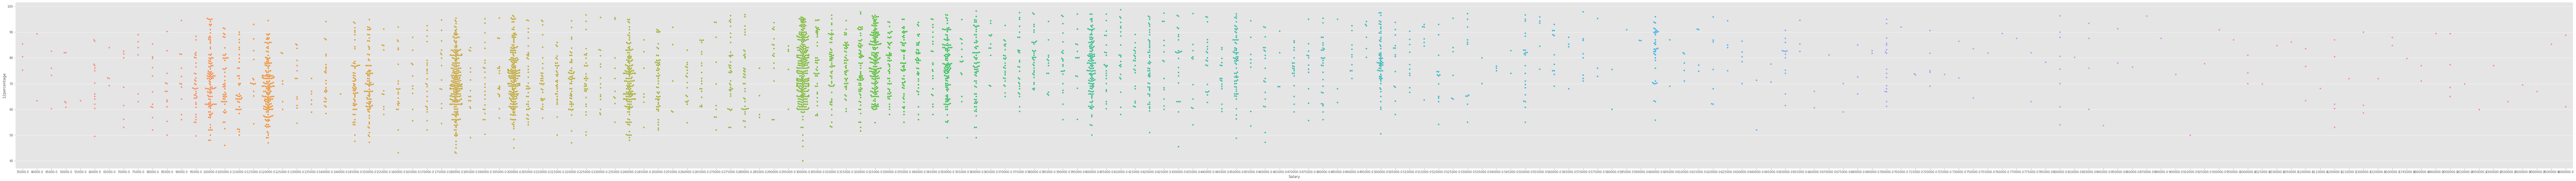

In [56]:
Biplots(dataset1['Salary'],dataset1['12percentage'])

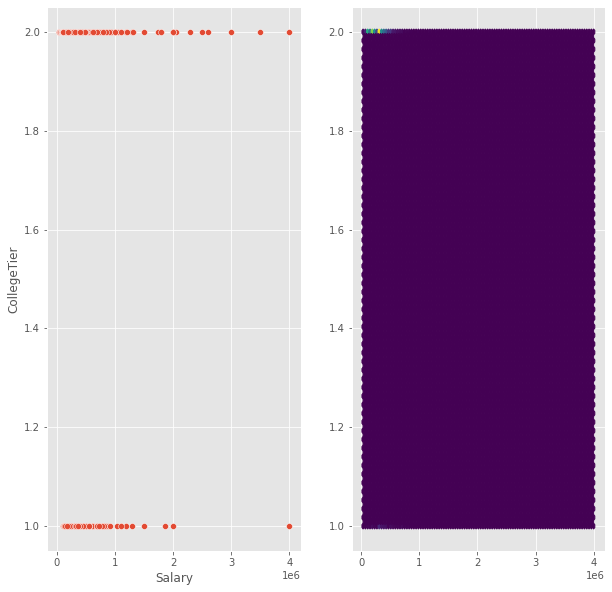

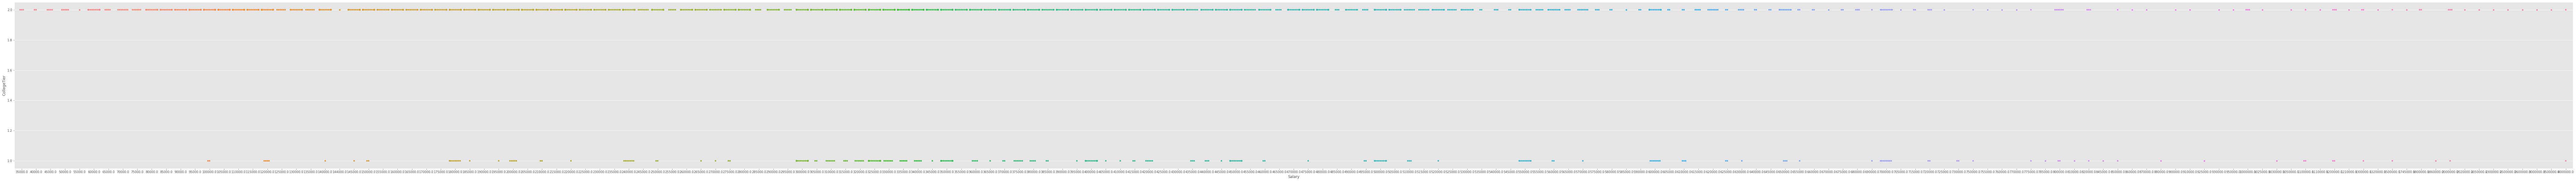

In [57]:
Biplots(dataset1['Salary'],dataset1['CollegeTier'])

In [58]:
px.scatter(dataset1['Salary'],dataset1['Designation'])


In [59]:
px.scatter(dataset1['Salary'],dataset1['JobCity'])

In [80]:
dataset2 = dataset1[dataset1.Specialization == 'computer science & engineering']

In [81]:
jobs = ['software engineer','programmer analyst','associate engineer','hardware engineer']

In [82]:
dataset2

ID    Salary  ... nueroticism openess_to_experience
6      947847  300000.0  ...     -2.0092               -1.0872
18     711342  120000.0  ...     -0.2344                1.4386
24     963123  335000.0  ...     -0.9950               -0.6692
25     350211  435000.0  ...      0.5323               -0.2875
31    1094324  340000.0  ...     -1.5021                0.2889
...       ...       ...  ...         ...                   ...
3969  1233826  330000.0  ...     -0.2344                0.8637
3975  1240207  300000.0  ...      0.3995                0.4805
3981  1077872  220000.0  ...     -1.1218                1.4386
3989  1204604  300000.0  ...      1.0333                0.6721
3996   947111  200000.0  ...     -0.3612               -0.0943

[744 rows x 38 columns]

In [83]:
dataset_jobs = dataset1[dataset1['Designation'].isin(jobs)]

In [84]:
dataset_jobs['Designation'].value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f39a06b5310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f39a06b9410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39a06c0450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f39a06b9ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f39a06b5950>,
  <matplotlib.lines.Line2D at 0x7f39a06b5e90>]}

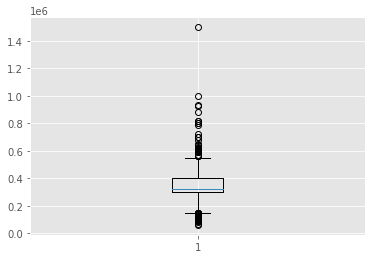

In [85]:
plt.boxplot(dataset_jobs['Salary'],)

In [86]:
np.max(dataset_jobs.Salary)

1500000.0

In [87]:
np.min(dataset_jobs.Salary)

60000.0

In [88]:
Q1  = dataset_jobs.Salary.quantile(0.25)
Q3 = dataset_jobs.Salary.quantile(0.75)

In [89]:
IQR = Q3 - Q1
IQR

100000.0

In [90]:
upper_limit = Q3 + 1.5*IQR
upper_limit

550000.0

In [91]:
lower_limit = Q1 - 1.5*IQR
lower_limit

150000.0

In [92]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [93]:
dataset1.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [94]:
dataset1.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [95]:
pd.crosstab(dataset1.Specialization, dataset1.Gender, margins=True)

Gender                                         f     m   All
Specialization                                              
aeronautical engineering                       1     2     3
applied electronics and instrumentation        2     7     9
automobile/automotive engineering              0     5     5
biomedical engineering                         2     0     2
biotechnology                                  9     6    15
ceramic engineering                            0     1     1
chemical engineering                           1     8     9
civil engineering                              6    23    29
computer and communication engineering         0     1     1
computer application                          59   185   244
computer engineering                         175   425   600
computer networking                            0     1     1
computer science                               1     1     2
computer science & engineering               183   561   744
computer science and technology                2     4     6
control and instrumentation engineering        0     1     1
electrical and power engineering               0     2     2
electrical engineering                        17    65    82
electronics                                    0     1     1
electronics & instrumentation eng             10    22    32
electronics & telecommunications              28    93   121
electronics and communication engineering    212   668   880
electronics and computer engineering           0     3     3
electronics and electrical engineering        34   162   196
electronics and instrumentation engineering    5    22    27
electronics engineering                        3    16    19
embedded systems technology                    0     1     1
industrial & management engineering            0     1     1
industrial & production engineering            2     8    10
industrial engineering                         1     1     2
information & communication technology         2     0     2
information science                            0     1     1
information science engineering                8    19    27
information technology                       173   487   660
instrumentation and control engineering        9    11    20
instrumentation engineering                    0     4     4
internal combustion engine                     0     1     1
mechanical & production engineering            0     1     1
mechanical and automation                      0     5     5
mechanical engineering                        10   191   201
mechatronics                                   1     3     4
metallurgical engineering                      0     2     2
other                                          0    13    13
polymer technology                             0     1     1
power systems and automation                   0     1     1
telecommunication engineering                  1     5     6
All                                          957  3041  3998

In [96]:
observed = pd.crosstab(dataset1.Specialization, dataset1.Gender)

In [97]:
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [107]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dataset2 = chi2_contingency(observed)[2]

In [108]:
confidence_level = 0.90

alpha_1 = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha_1, df_2)

chi2_critical

57.50530474499599

In [109]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


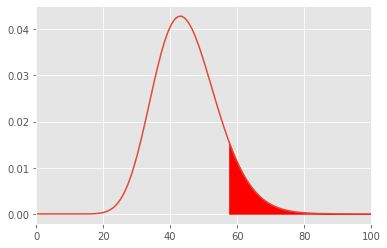

In [112]:
x_min = 0
x_max = 100
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dataset2)
plt.xlim(x_min, x_max)
plt.plot(x, y)
chi2_critical_right = chi2_critical
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dataset2)
plt.fill_between(x1, y1, color='red')